In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = 'D:\\__Max__\\Documents\\Machine Learning Course LANIA\\Recursos complementarios-20210804\\Datasets\\Folds5x2_pp.xlsx'
Df1 = pd.read_excel(url, sheet_name='Sheet1', header=0)
Df2 = pd.read_excel(url, sheet_name='Sheet2', header=0)
Df3 = pd.read_excel(url, sheet_name='Sheet3', header=0)
energy=pd.concat([Df1, Df2, Df3])
energy.describe()

,AT,V,AP,RH,PE
count,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452214,12.707450,5.938577,14.599760,17.066400
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [2]:
energy.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
propiedades = energy.iloc[:,0:4]
objetivo = energy['PE']

propiedades_train, propiedades_test, objetivo_train, objetivo_test = train_test_split(propiedades, objetivo, test_size=0.2, random_state=0)

print('Número de instancias de entrenamiento: '+str(len(propiedades_train)))
print('Número de instancias de prueba: '+str(len(propiedades_test)))
print('Número de instancias de totales: '+str(len(energy.index)))

Número de instancias de entrenamiento: 22963
Número de instancias de prueba: 5741
Número de instancias de totales: 28704


## Algoritmo: Máquina de Soporte Vectorial Regresión para la predicción de energía.

In [4]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(propiedades_train, objetivo_train)

SVR()

In [5]:
objetivo_prediccion = regressor.predict(propiedades_test)

In [6]:
Dataframe_SVM = pd.DataFrame({'Valores Esperados':objetivo_test, 'Predicción':objetivo_prediccion, 'Diferencia':(objetivo_test-objetivo_prediccion)})
Dataframe_SVM
#OJO: no me pidió hacer el método (atributo) ".reshape"(-1)

,Valores Esperados,Predicción,Diferencia
7657,449.05,447.023474,2.026526
165,464.22,461.539719,2.680281
8596,443.53,451.248709,-7.718709
6126,441.49,445.098962,-3.608962
9533,440.97,447.239266,-6.269266
...,...,...,...
2811,436.56,437.839777,-1.279777
4894,482.17,467.476213,14.693787
9011,436.92,445.194788,-8.274788
631,479.28,466.546126,12.733874


In [7]:
mse = mean_squared_error(y_true = objetivo_test, y_pred = objetivo_prediccion)
rmse = np.sqrt(mse)
r2SVM = regressor.score(propiedades_test, objetivo_test)
print('MSE = '+str(mse))
print('RMSE = '+str(rmse))
print('R2_SVM = '+str(r2SVM))

MSE = 81.67859240023985
RMSE = 9.037620948028295
R2_SVM = 0.7170333206895577


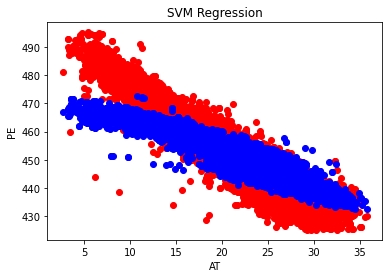

In [8]:
propiedades_grid = np.arange(min(propiedades['AT']), max(propiedades['AT']), 0.1)
plt.scatter(propiedades_test['AT'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AT'], objetivo_prediccion, color = 'blue')
plt.title('SVM Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

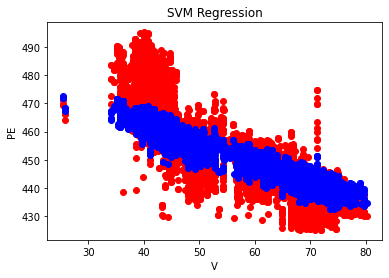

In [9]:
propiedades_grid = np.arange(min(propiedades['V']), max(propiedades['V']), 0.1)
plt.scatter(propiedades_test['V'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['V'], objetivo_prediccion, color = 'blue')
plt.title('SVM Regression')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

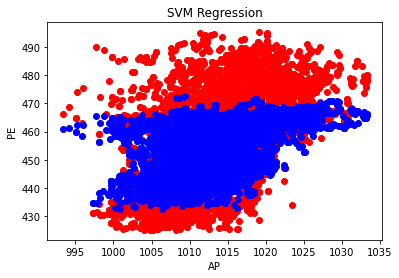

In [10]:
propiedades_grid = np.arange(min(propiedades['AP']), max(propiedades['AP']), 0.1)
plt.scatter(propiedades_test['AP'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AP'], objetivo_prediccion, color = 'blue')
plt.title('SVM Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

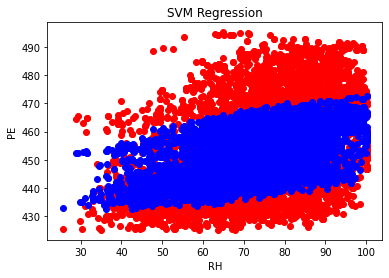

In [11]:
propiedades_grid = np.arange(min(propiedades['RH']), max(propiedades['RH']), 0.1)
plt.scatter(propiedades_test['RH'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['RH'], objetivo_prediccion, color = 'blue')
plt.title('SVM Regression')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

## Algoritmo: Perceptrón Multicapa Regresión para la predicción de energía.

In [12]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(activation='relu',
                   solver = 'adam',
                   hidden_layer_sizes=(7),
                   verbose=True,
                   learning_rate_init=00.03)
mlp.fit(propiedades_train, objetivo_train)

Iteration 1, loss = 3084.58223087
Iteration 2, loss = 25.25800585
Iteration 3, loss = 20.30444968
Iteration 4, loss = 17.48189100
Iteration 5, loss = 15.32044191
Iteration 6, loss = 13.92051336
Iteration 7, loss = 14.46084089
Iteration 8, loss = 14.01353811
Iteration 9, loss = 14.54161991
Iteration 10, loss = 13.72173650
Iteration 11, loss = 13.58649710
Iteration 12, loss = 14.43488311
Iteration 13, loss = 13.84794945
Iteration 14, loss = 13.98096530
Iteration 15, loss = 13.56354953
Iteration 16, loss = 13.96096221
Iteration 17, loss = 13.99718196
Iteration 18, loss = 13.76577393
Iteration 19, loss = 15.08005113
Iteration 20, loss = 15.68481511
Iteration 21, loss = 14.17325896
Iteration 22, loss = 13.59387905
Iteration 23, loss = 14.69508998
Iteration 24, loss = 15.18923569
Iteration 25, loss = 14.47770927
Iteration 26, loss = 13.83094641
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=7, learning_rate_init=0.03, verbose=True)

In [13]:
energy_predict =  mlp.predict(propiedades_test)
r2MLP = mlp.score(propiedades_test, objetivo_test)
mseMLP = mean_squared_error(y_true = objetivo_test, y_pred = energy_predict)
rmseMLP = np.sqrt(mseMLP)
print('MSE MLP = '+str(mseMLP))
print('RMSE MLP = '+str(rmseMLP))
print('R2 MLP = '+str(r2MLP))

MSE MLP = 27.514041841000314
RMSE MLP = 5.245382906995476
R2 MLP = 0.9046805677550638


In [14]:
Dataframe_MLP = pd.DataFrame({'Valores Esperados':objetivo_test, 'Predicción':energy_predict, 'Diferencia':(objetivo_test-energy_predict)})
Dataframe_MLP

,Valores Esperados,Predicción,Diferencia
7657,449.05,450.464312,-1.414312
165,464.22,465.560719,-1.340719
8596,443.53,453.334456,-9.804456
6126,441.49,440.139403,1.350597
9533,440.97,442.511769,-1.541769
...,...,...,...
2811,436.56,433.143093,3.416907
4894,482.17,481.806960,0.363040
9011,436.92,438.349280,-1.429280
631,479.28,482.494351,-3.214351


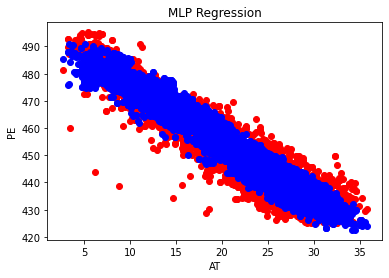

In [15]:
plt.scatter(propiedades_test['AT'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AT'], energy_predict, color = 'blue')
plt.title('MLP Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

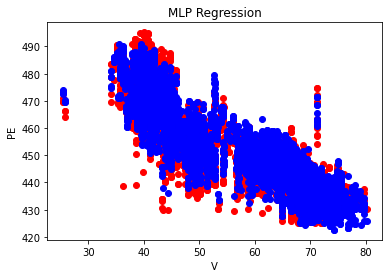

In [16]:
plt.scatter(propiedades_test['V'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['V'], energy_predict, color = 'blue')
plt.title('MLP Regression')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

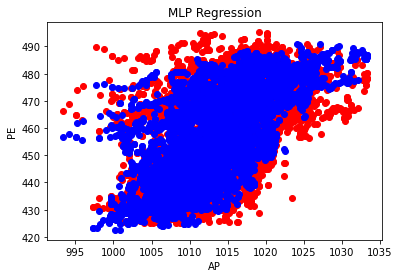

In [17]:
plt.scatter(propiedades_test['AP'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AP'], energy_predict, color = 'blue')
plt.title('MLP Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

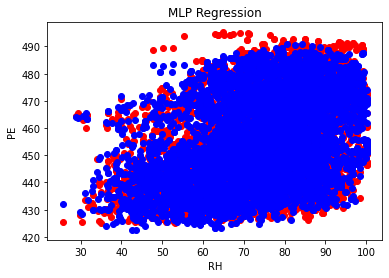

In [18]:
plt.scatter(propiedades_test['RH'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['RH'], energy_predict, color = 'blue')
plt.title('MLP Regression')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

## Algoritmo: KNN Regresión para la predicción de energía

In [19]:
from sklearn.neighbors import KNeighborsRegressor

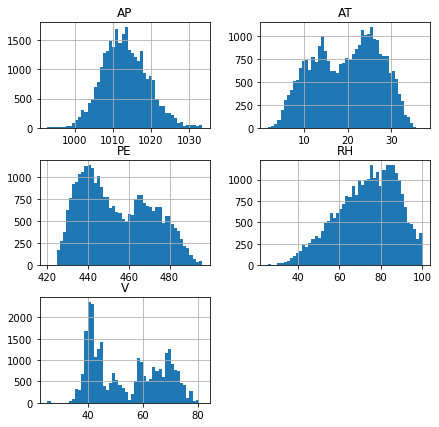

In [20]:
energy.hist(bins=50, figsize=(7,7))
plt.show()

In [31]:
knnR = KNeighborsRegressor(n_neighbors=2)
knnR.fit(propiedades_train, objetivo_train)

KNeighborsRegressor(n_neighbors=2)

In [32]:
predict_obj = knnR.predict(propiedades_test)

mseK = mean_squared_error(y_true = objetivo_test, y_pred = predict_obj)

rmseK = np.sqrt(mseK)

r2knn = knnR.score(propiedades_test, objetivo_test)

print('mseK = '+str(mseK))
print('rmseK = '+str(rmseK))
print('R2_knn = '+str(r2knn))

mseK = 2.565080473785058
rmseK = 1.601586861142741
R2_knn = 0.9911135551862316


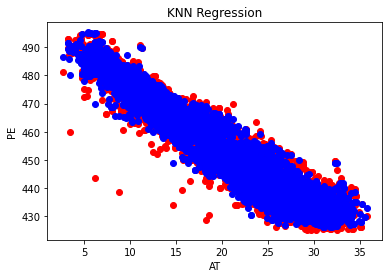

In [23]:
plt.scatter(propiedades_test['AT'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AT'], predict_obj, color = 'blue')
plt.title('KNN Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

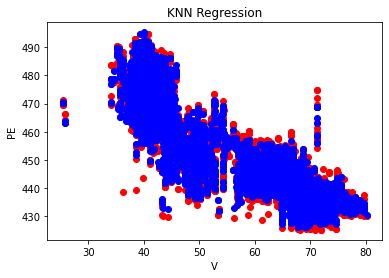

In [24]:
plt.scatter(propiedades_test['V'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['V'], predict_obj, color = 'blue')
plt.title('KNN Regression')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

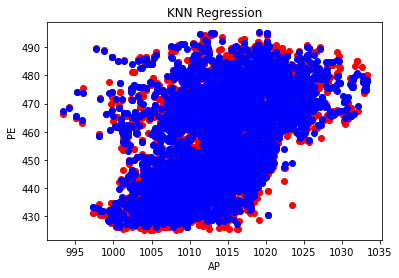

In [25]:
plt.scatter(propiedades_test['AP'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['AP'], predict_obj, color = 'blue')
plt.title('KNN Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

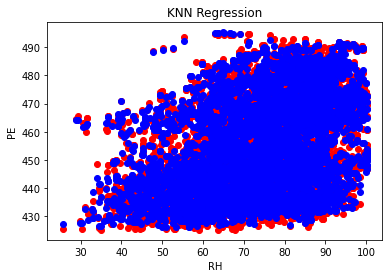

In [26]:
plt.scatter(propiedades_test['RH'], objetivo_test, color = 'red')
plt.scatter(propiedades_test['RH'], predict_obj, color = 'blue')
plt.title('KNN Regression')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

In [27]:
tasa_error = []
for i in range(1,40):
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(propiedades_train, objetivo_train)
    pred_i = knnr.predict(propiedades_test)
    mse = mean_squared_error(y_true = objetivo_test, y_pred = pred_i)
    tasa_error.append(np.sqrt(mse))

Text(0, 0.5, 'RMSE')

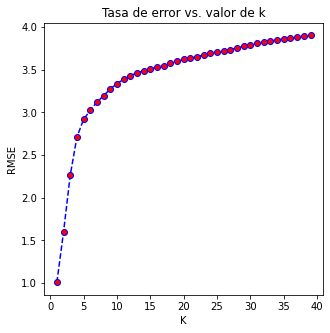

In [30]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40),tasa_error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=6)
plt.title('Tasa de error vs. valor de k')
plt.xlabel('K')
plt.ylabel('RMSE')

In [ ]:
Dataframe_KNN = pd.DataFrame({'Valores Esperados':objetivo_test, 'Predicción':predict_obj, 'Diferencia':(objetivo_test-predict_obj)})
Dataframe_KNN

## Resumen de Resultados por Algoritmo

In [33]:
Resultados_Df = pd.DataFrame({'Algoritmo Regresión':['Regresión lineal', 'Árbol de decisión', 'Máquina de Soporte Vectorial', 'Perceptrón Multicapa', 'KNN'], 
                              'MSE':[20.7496, 15.2516, mse, mseMLP, mseK ], 
                              'RMSE':[4.5551, 3.9053, rmse, rmseMLP, rmseK],
                              'R2': [0.9968, 0.9471, r2SVM, r2MLP, r2knn]
                             })
Resultados_Df

,Algoritmo Regresión,MSE,RMSE,R2
0,Regresión lineal,20.749600,4.555100,0.996800
1,Árbol de decisión,15.251600,3.905300,0.947100
2,Máquina de Soporte Vectorial,15.218792,9.037621,0.717033
3,Perceptrón Multicapa,27.514042,5.245383,0.904681
4,KNN,2.565080,1.601587,0.991114


## Reducción de Dimensionalidad. PCA

A continuación se aplicará el procedimiento de Análisis de Componente Principal (PCA) para reducir la dimensionalidad del Dataset EnergyPrediction (Predicción de Energía). Para comparar resultados como parte de la Práctica no. 4.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

url = "D:\\__Max__\\Documents\Machine Learning Course LANIA\\1. Fundamentos Machine Leargning\\Datasets\\Folds5x2_pp.xlsx"
Df1 = pd.read_excel(url, sheet_name='Sheet1', header=0)
Df2 = pd.read_excel(url, sheet_name='Sheet2', header=0)
Df3 = pd.read_excel(url, sheet_name='Sheet3', header=0)
energy=pd.concat([Df1, Df2, Df3])
energy.describe()

,AT,V,AP,RH,PE
count,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452214,12.707450,5.938577,14.599760,17.066400
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


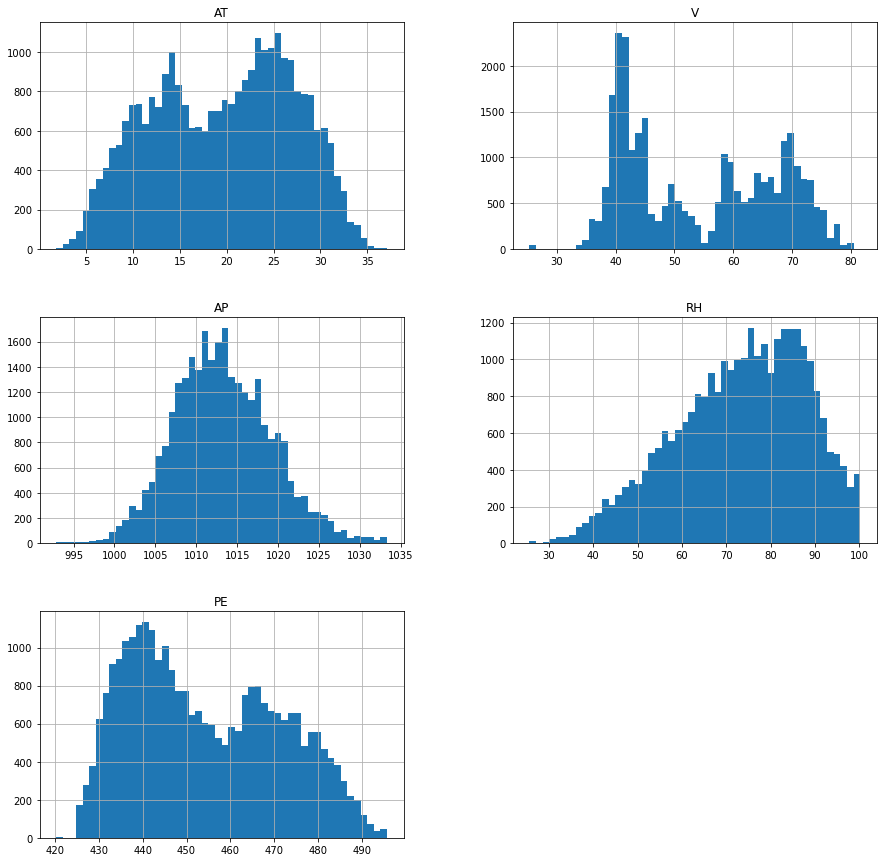

In [7]:
energy.hist(bins=50, figsize=(15,15))
plt.show()

In [9]:
features = energy.iloc[:,0:4]
target = energy['PE']

scaler = StandardScaler()
featuresStd = scaler.fit_transform(features)
featuresStd

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ],
       ...,
       [-0.70332424, -1.06048328, -0.57911823,  0.48775776],
       [-0.74358144, -0.72602798,  1.68577364,  0.67886011],
       [-0.8589854 , -0.83462758,  0.05909294,  0.1877476 ]])

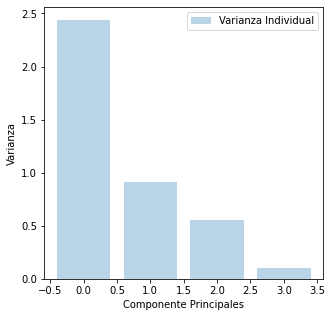

In [19]:
pca = PCA()
pca.fit_transform(featuresStd)
pca_variance = pca.explained_variance_

pca_variance

plt.figure(figsize=(5,5))
plt.bar(range(4), pca_variance, alpha=0.3, align='center', label='Varianza Individual')
plt.legend()
plt.ylabel('Varianza')
plt.xlabel('Componente Principales')
plt.show()

In [25]:
pca2 = PCA(n_components=3)
pca2.fit(featuresStd)
X = pca2.transform(featuresStd)

In [26]:
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0
    N = 0
    for i in cumm_var:
        N += 1
        total_var += i
        if total_var >= var:
            break
    return N

In [27]:
pca2 = PCA().fit(featuresStd)
n = get_pca_components(pca2, 0.95)
n

3

In [29]:
pca3 = PCA(n_components=n)
featuresPCA = pca3.fit_transform(featuresStd)
featuresPCA

array([[-1.67179605, -1.25446702, -0.44903077],
       [ 0.74740738, -1.44347131, -0.78422845],
       [-2.27321786,  1.07178414,  0.52702894],
       ...,
       [-0.9778604 ,  0.67221498,  0.87988225],
       [-1.80372775, -0.61695926, -0.82653777],
       [-1.09071617,  0.06273226,  0.51261016]])

## Conclusión
Después de ejecutar el procedimiento para reducción de dimensionalidad del Dataset de EnergyPrediction, se obtuvo que para el criterio de sumatoria de varianza igual a 0.95, se puede prescindir de una variable y solo trabajar con 3.

(Duda: ¿se puede saber cuáles serían esas 3 variables?)

A continuación, utilizaremos el algoritmo de Machine Learning que mejores resultados obtuvo previo a PCA, que fue: KNN.

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
featuresPCA
target = energy['PE']

featuresPCA_train, featuresPCA_test, target_train, target_test = train_test_split(featuresPCA, target, test_size=0.2, random_state=0)

print('Número de instancias de entrenamiento: '+str(len(featuresPCA_train)))
print('Número de instancias de prueba: '+str(len(featuresPCA_test)))
print('Número de instancias de totales: '+str(len(energy.index)))                                                 

Número de instancias de entrenamiento: 22963
Número de instancias de prueba: 5741
Número de instancias de totales: 28704


In [36]:
knnR = KNeighborsRegressor(n_neighbors=2)
knnR.fit(featuresPCA_train, target_train)

KNeighborsRegressor(n_neighbors=2)

In [43]:
predict_target = knnR.predict(featuresPCA_test)

from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_true = target_test, y_pred = predict_target)

import numpy as np
rmse = np.sqrt(mse)

r2 = knnR.score(featuresPCA_test, target_test)

print('mse = ' +str(mse))
print('rmse = ' +str(rmse))
print('R2 = ' +str(r2))

mse = 3.309696067758228
rmse = 1.819257009814234
R2 = 0.9885339147223401


## Comparación de resultados Con PCA vs Sin PCA

In [45]:
Comparacion = pd.DataFrame({'Resultados':['Con PCA', 'Sin PCA'],
                            'MSE':[mse, 2.56508],
                            'RMSE':[rmse, 1.60159],
                            'R2':[r2, 0.99111]
                            })
Comparacion

,Resultados,MSE,RMSE,R2
0,Con PCA,3.309696,1.819257,0.988534
1,Sin PCA,2.565080,1.601590,0.991110


## Conclusión

Se observa que, definitivamente, los resultados obtenidos después de reducir la dimensionalidad del DataFrame Energy Prediction son muy buenos, no obstante, son aún mejores los resultados que se obtienen si se consideran todas las características del problema (4 en lugar de 3).